In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##4.1(a)

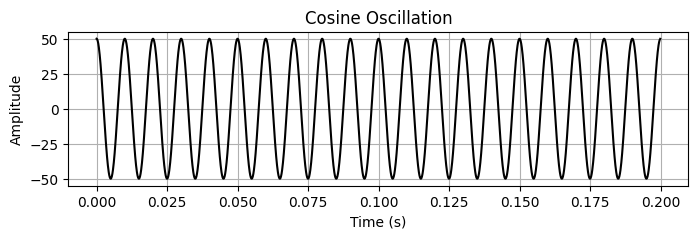

In [ ]:
f0_1 = 100
A1 = 50
f_A = 10000
N = 2000

t = np.arange(N) / f_A


x_1 = A1 * np.cos(2 * np.pi * f0_1 * t)

plt.figure(figsize=(8, 2))
plt.plot(t, x_1, label='Cosine Oscillation (100 Hz)', color='black')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Cosine Oscillation')
plt.grid(True)
plt.show()


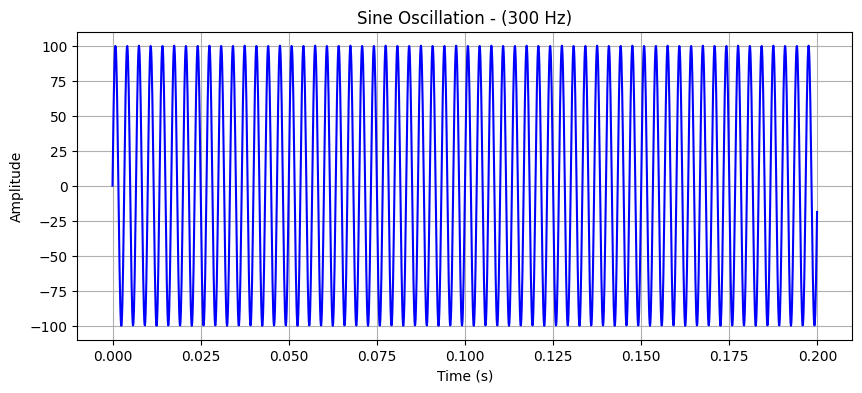

In [ ]:

f0_2 = 300
A2 = 100
f_A = 10000
N = 2000


t = np.arange(N) / f_A

x_2 = A2 * np.sin(2 * np.pi * f0_2 * t)

plt.figure(figsize=(10, 4))
plt.plot(t, x_2, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Oscillation - (300 Hz)')
plt.grid(True)
plt.show()


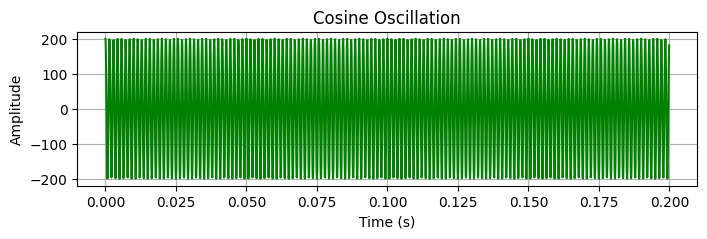

In [ ]:
f0_3 = 700
A3 = 200
f_A = 10000
N = 2000

t = np.arange(N) / f_A


x_3 = A3 * np.cos(2 * np.pi * f0_3 * t)

plt.figure(figsize=(8, 2))
plt.plot(t, x_3, label='Cosine Oscillation (100 Hz)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Cosine Oscillation')
plt.grid(True)
plt.show()


#4(b)

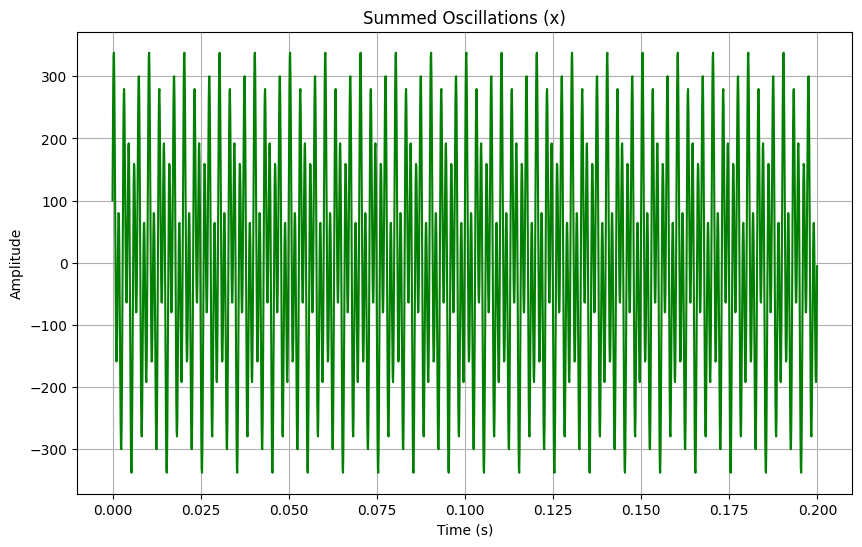

In [ ]:

x = x_1 + x_2 + x_3

plt.figure(figsize=(10, 6))
plt.plot(t, x, color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Summed Oscillations (x)')

plt.grid(True)
plt.show()


#4.1(c)

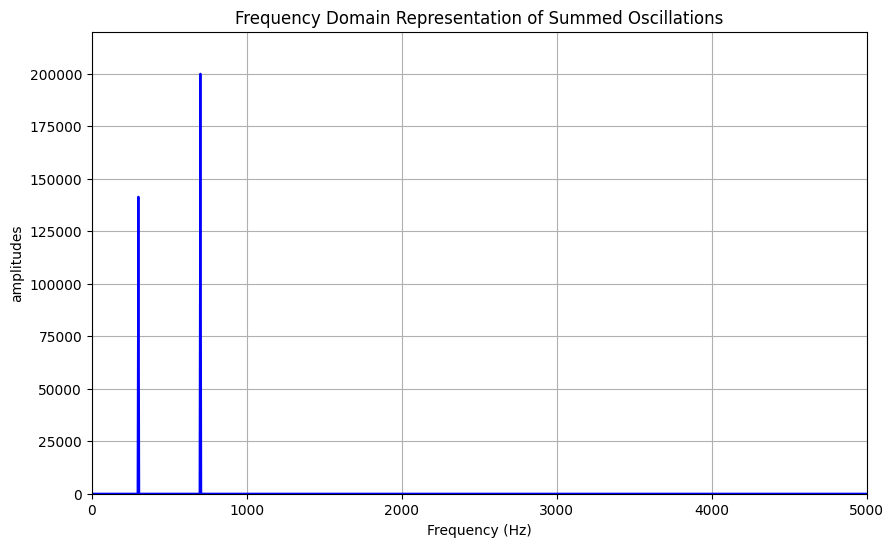

In [ ]:
def dft(signal):
    N = len(signal)
    dft_result = np.zeros(N, dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            dft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return dft_result

x = x_1 + x_2 + x_3

# DFT
dft_result = dft(x)

frequencies = np.arange(N) * f_A / N

amplitudes = np.abs(dft_result)

plt.figure(figsize=(10, 6))
plt.plot(frequencies, amplitudes , color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('amplitudes')
plt.title('Frequency Domain Representation of Summed Oscillations')
plt.grid(True)
plt.xlim(0, f_A / 2)
plt.ylim(0, max(amplitudes) * 1.1)
plt.show()


# 4.2 (A) High pass

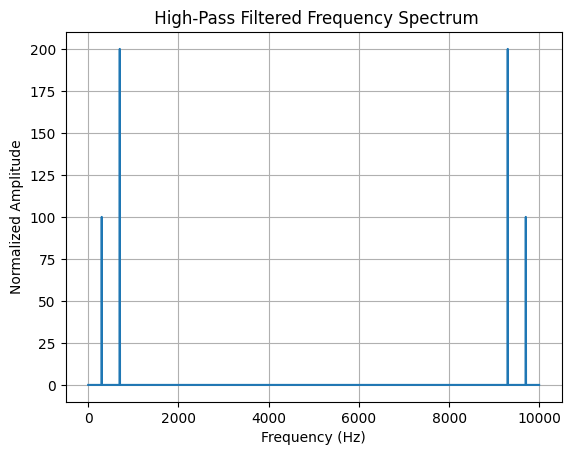

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 10000
num_samples = 2000
time = np.arange(num_samples) / sampling_rate

x1 = 50 * np.cos(2 * np.pi * 100 * time)
x2 = 100 * np.sin(2 * np.pi * 300 * time)
x3 = 200 * np.sin(2 * np.pi * 700 * time)

combined_signal = x1 + x2 + x3

N = len(combined_signal)
dft_output = np.zeros(N, dtype=complex)
for k in range(N):
    complex_value = 0
    for n in range(N):
        angle = 2 * np.pi * k * n / N
        complex_value += combined_signal[n] * np.exp(-1j * angle)
    dft_output[k] = complex_value

frequencies = np.arange(N) * (sampling_rate / N)

cutoff_frequency = 150
filter_mask = np.ones(N)
filter_mask[(frequencies < cutoff_frequency) | (frequencies > sampling_rate - cutoff_frequency)] = 0

high_filtered_dft_output = dft_output * filter_mask
normalized_filtered_amplitude = np.abs(high_filtered_dft_output) / (num_samples / 2)

plt.plot(frequencies, normalized_filtered_amplitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Amplitude")
plt.title(" High-Pass Filtered Frequency Spectrum")
plt.grid(True)
plt.show()

4.2(b)

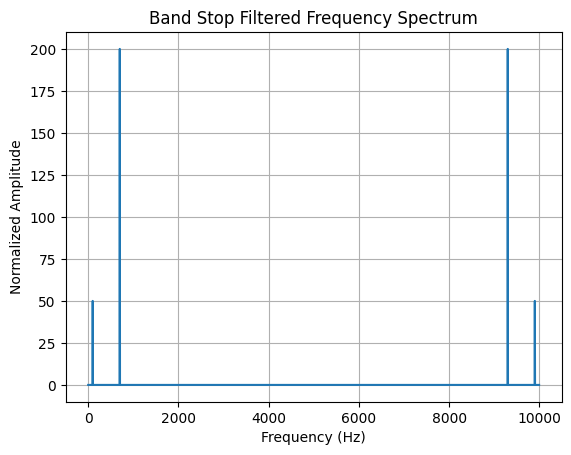

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sampling_rate = 10000
num_samples = 2000
time = np.arange(num_samples) / sampling_rate

x1 = 50 * np.cos(2 * np.pi * 100 * time)
x2 = 100 * np.sin(2 * np.pi * 300 * time)
x3 = 200 * np.sin(2 * np.pi * 700 * time)

combined_signal = x1 + x2 + x3

N = len(combined_signal)
dft_output = np.zeros(N, dtype=complex)

for k in range(N):
    complex_value = complex(0, 0)
    for n in range(N):
        angle = 2 * np.pi * k * n / N
        complex_value += combined_signal[n] * np.exp(-1j * angle)
    dft_output[k] = complex_value

frequencies = np.array([k * (sampling_rate / num_samples) for k in range(num_samples)])
stop_low=250
stop_high=350
filter_mask = np.ones(N)
filter_mask[((frequencies >= stop_low) & (frequencies <= stop_high)) |
            ((frequencies >= sampling_rate - stop_high) & (frequencies <= sampling_rate - stop_low))] = 0
band_stop_filtered_dft_output = dft_output * filter_mask
normalized_filtered_amplitude = np.abs(band_stop_filtered_dft_output) / (num_samples / 2)
plt.plot(frequencies, normalized_filtered_amplitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Amplitude")
plt.title("Band Stop Filtered Frequency Spectrum")
plt.grid(True)
plt.show()

##low pass 4.2(c)

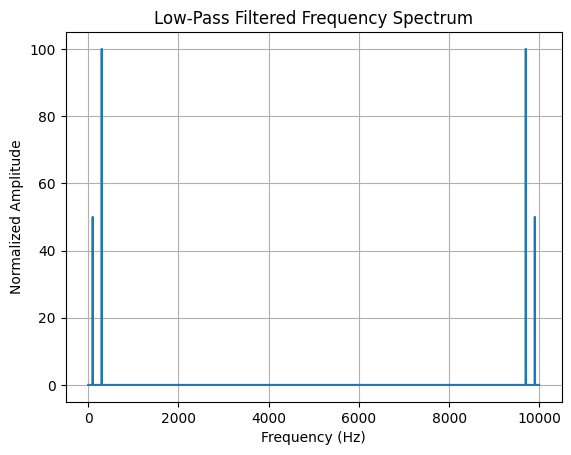

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 10000
num_samples = 2000
time = np.arange(num_samples) / sampling_rate

x1 = 50 * np.cos(2 * np.pi * 100 * time)
x2 = 100 * np.sin(2 * np.pi * 300 * time)
x3 = 200 * np.sin(2 * np.pi * 700 * time)

combined_signal = x1 + x2 + x3

N = len(combined_signal)
dft_output = np.zeros(N, dtype=complex)
for k in range(N):
    complex_value = 0
    for n in range(N):
        angle = 2 * np.pi * k * n / N
        complex_value += combined_signal[n] * np.exp(-1j * angle)
    dft_output[k] = complex_value

frequencies = np.arange(N) * (sampling_rate / N)

cutoff_frequency = 650
filter_mask = np.zeros(N)
filter_mask[(frequencies <= cutoff_frequency) | (frequencies >= sampling_rate - cutoff_frequency)] = 1

low_pass_filtered_dft_output = dft_output * filter_mask
normalized_filtered_amplitude = np.abs(low_pass_filtered_dft_output) / (num_samples / 2)

plt.plot(frequencies, normalized_filtered_amplitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Amplitude")
plt.title("Low-Pass Filtered Frequency Spectrum")
plt.grid(True)
plt.show()

#4.3 (a)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def IDFT(frequency_signal):
    N = len(frequency_signal)
    time_domain_signal = np.zeros(N, dtype=complex)

    for n in range(N):
        complex_value = 0
        for k in range(N):
            angle = 2 * np.pi * k * n / N
            complex_value += frequency_signal[k] * np.exp(1j * angle)
        time_domain_signal[n] = complex_value / N

    return time_domain_signal

sampling_rate = 10000
num_samples = 2000
time = np.arange(num_samples) / sampling_rate

#4.3(b)

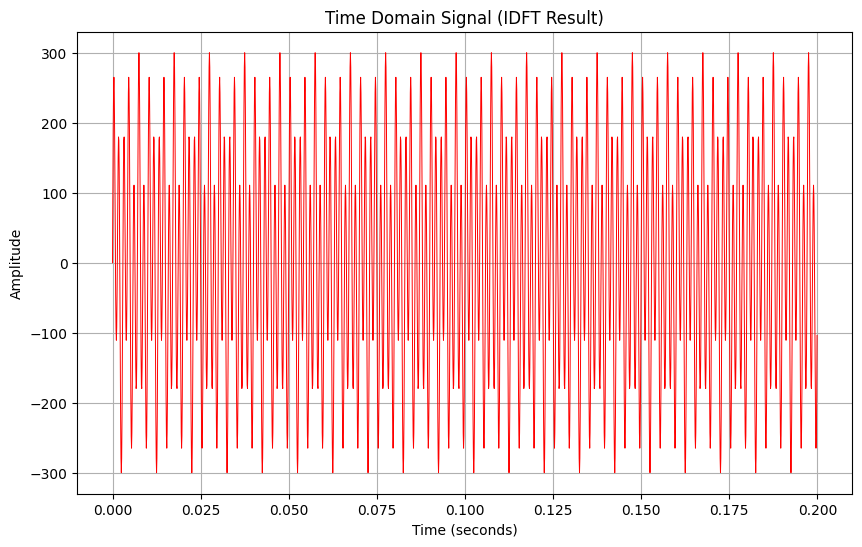

In [ ]:


time_domain_signal = IDFT(high_filtered_dft_output)

plt.figure(figsize=(10, 6))
plt.plot(time, np.real(time_domain_signal), color='r', linewidth=0.7)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal (IDFT Result)")
plt.grid(True)
plt.show()

#4.3(c)

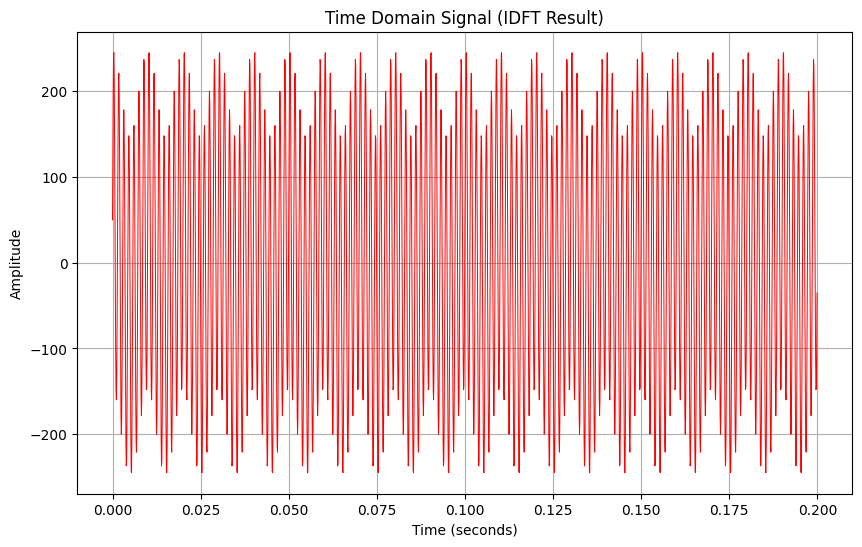

In [ ]:
time_domain_signal = IDFT(band_stop_filtered_dft_output)

plt.figure(figsize=(10, 6))
plt.plot(time, np.real(time_domain_signal),color='r', linewidth=0.7)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal (IDFT Result)")
plt.grid(True)
plt.show()

# 4.3 (d)

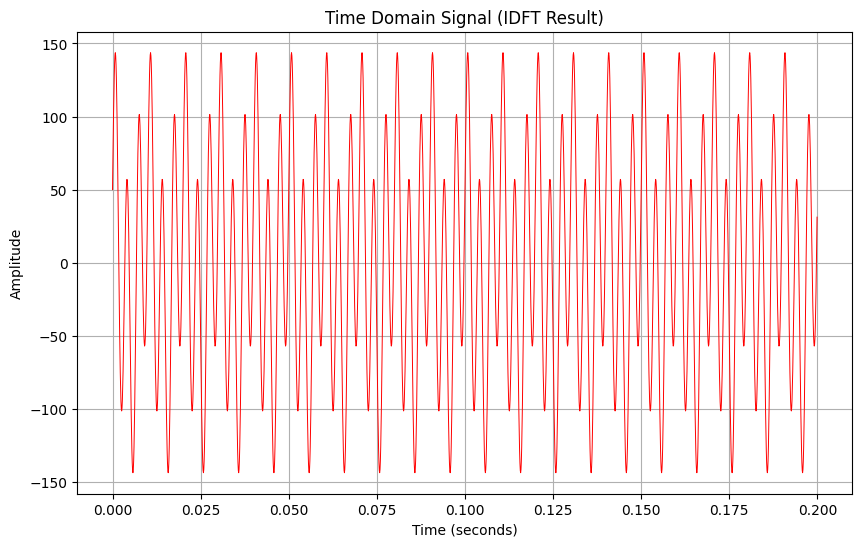

In [ ]:
time_domain_signal = IDFT(low_pass_filtered_dft_output)

plt.figure(figsize=(10, 6))
plt.plot(time, np.real(time_domain_signal), color='r',linewidth=0.7)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal (IDFT Result)")
plt.grid(True)
plt.show()